In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load data
data = pd.read_csv('/datasets/eteplygina/combined_data.csv')
data = data.drop(['time_rounded', 'shock_time', 'ethnicity', 'gender', 'height', 'weight', 'relative_time', 'age'], axis=1)

print("Shape of original data array:", data.shape)
print(data)

# Create label dictionary
label_dict = data.groupby('id')['label'].first().to_dict()
print("Label Dictionary:", label_dict)  

# Split data into train and test sets while preserving IDs
train_ids, test_ids = train_test_split(data['id'].unique(), test_size=0.2, random_state=42)
print(train_ids)

# Split labels into train and test sets
train_labels_dict = {id: label_dict[id] for id in train_ids}
test_labels_dict = {id: label_dict[id] for id in test_ids}

train_labels = np.array(list(train_labels_dict.values()))
test_labels = np.array(list(test_labels_dict.values()))

# Filter the DataFrame to extract the rows corresponding to train_ids and test_ids
train_data_indices = data['id'].isin(train_ids)
test_data_indices = data['id'].isin(test_ids)
print(train_data_indices)

# Normalize the data for train and test sets separately
scaler = StandardScaler()

# Filter the DataFrame to extract the rows corresponding to train_ids and test_ids
train_data_filtered = data[train_data_indices].drop(['label'], axis=1)
test_data_filtered = data[test_data_indices].drop(['label'], axis=1)

# Apply normalization to train data
train_data_filtered.iloc[:, 1:] = scaler.fit_transform(train_data_filtered.iloc[:, 1:]).astype('float64')

# Apply normalization to test data
test_data_filtered.iloc[:, 1:] = scaler.transform(test_data_filtered.iloc[:, 1:]).astype('float64')

print(train_data_filtered)
print(test_data_filtered)

# Print shapes after filtering
print("Shape of filtered train data DataFrame:", train_data_filtered.shape)
print("Shape of filtered test data DataFrame:", test_data_filtered.shape)
print("Shape of train labels array after filtering:", train_labels.shape)
print("Shape of test labels array after filtering:", test_labels.shape)

# Count unique positive and negative IDs in train and test sets
train_pos_ids = np.sum(train_labels == 1)
train_neg_ids = np.sum(train_labels == 0)
test_pos_ids = np.sum(test_labels == 1)
test_neg_ids = np.sum(test_labels == 0)

print("Train Set:")
print("Number of unique positive IDs:", train_pos_ids)
print("Number of unique negative IDs:", train_neg_ids)

print("Test Set:")
print("Number of unique positive IDs:", test_pos_ids)
print("Number of unique negative IDs:", test_neg_ids)

# Pad sequences for train and test data separately
max_sequence_length_train = train_data_filtered.groupby('id').size().max()
max_sequence_length_test = test_data_filtered.groupby('id').size().max()
print(max_sequence_length_train, max_sequence_length_test)

# For training data
train_sequences = []
for id in train_ids:
    id_data = train_data_filtered[train_data_filtered['id'] == id].drop(['id'], axis=1).values
    padded_sequence = pad_sequences([id_data], maxlen=max_sequence_length_train, padding='post', truncating='post', dtype='float64', value=100000.0)[0]
    train_sequences.append(padded_sequence)
train_data = np.array(train_sequences)

# For test data
test_sequences = []
for id in test_ids:
    id_data = test_data_filtered[test_data_filtered['id'] == id].drop(['id'], axis=1).values
    padded_sequence = pad_sequences([id_data], maxlen=max_sequence_length_train, padding='post', truncating='post', dtype='float64', value=100000.0)[0]
    test_sequences.append(padded_sequence)
test_data = np.array(test_sequences)
print(len(test_sequences))

train_data = np.array(train_sequences)
test_data = np.array(test_sequences)
print(train_data.shape)
print(test_data.shape)
print(train_data)

# Expand dimensions for labels
train_labels = np.expand_dims(train_labels, axis=1)
test_labels = np.expand_dims(test_labels, axis=1)

print("Shape of expanded labels array:")
print("Train labels:", train_labels)
print("Test labels:", test_labels.shape)


2024-06-26 00:20:54.439254: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-26 00:20:54.920352: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Shape of original data array: (1254724, 9)
               id  label  heartrate         sbp        dbp        mbp  \
0        30004144      1  75.000000  146.000000  74.000000  94.000000   
1        30004144      1  62.666667  140.333333  58.666667  86.000000   
2        30004144      1  74.666667  143.666667  61.000000  89.333333   
3        30004144      1  66.500000  138.500000  62.000000  89.000000   
4        30004144      1  66.000000  145.000000  61.500000  91.500000   
...           ...    ...        ...         ...        ...        ...   
1254719  38486358      0  60.000000  120.000000  88.000000  99.000000   
1254720  38486358      0  56.000000  119.000000  88.000000  99.000000   
1254721  38486358      0  56.000000  119.000000  88.000000  99.000000   
1254722  38486358      0  56.000000  125.000000  82.000000  94.000000   
1254723  38486358      0  56.000000  125.000000  82.000000  94.000000   

         respiration  temperature       spo2  
0          18.000000        36.33

In [10]:
# Repeat each label across all time steps
train_labels_repeated = np.repeat(train_labels, 345, axis=1)

# Reshape to add the third dimension
train_labels_reshaped = np.expand_dims(train_labels_repeated, axis=2)

# Print the shape of the new train labels array
print("Shape of train_labels_reshaped:", train_labels_reshaped)

test_labels_repeated = np.repeat(test_labels, 345, axis=1)

# Reshape to add the third dimension
test_labels_reshaped = np.expand_dims(test_labels_repeated, axis=2)

# Print the shape of the new test labels array
print("Shape of test_labels_reshaped:", test_labels_reshaped.shape)

Shape of train_labels_reshaped: [[[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 ...

 [[1]
  [1]
  [1]
  ...
  [1]
  [1]
  [1]]

 [[1]
  [1]
  [1]
  ...
  [1]
  [1]
  [1]]

 [[1]
  [1]
  [1]
  ...
  [1]
  [1]
  [1]]]
Shape of test_labels_reshaped: (3159, 336, 1)


In [3]:
import numpy as np
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, auc
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Masking, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback, ModelCheckpoint, EarlyStopping
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

# Define the manual weights based on class imbalance (1:4)
positive_weight = 4 
negative_weight = 1 

# Custom weighted binary crossentropy loss
def weighted_binary_crossentropy(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    weights = y_true * positive_weight + (1 - y_true) * negative_weight
    weights = tf.expand_dims(weights, axis=-1) 
    bce = tf.keras.losses.binary_crossentropy(y_true, y_pred)
    weighted_bce = bce * weights
    return tf.reduce_mean(weighted_bce)


class RecallCallback(Callback):
    def __init__(self, val_data, val_labels):
        super().__init__()
        self.val_data = val_data
        self.val_labels = val_labels
        self.best_recall = 0

    def on_epoch_end(self, epoch, logs=None):
        val_probabilities = self.model.predict(self.val_data)
        threshold = 0.5  
        val_predictions = (val_probabilities > threshold).astype(int)

        # Max Aggregation
        val_predictions_seq_max = (np.max(val_predictions, axis=1) > threshold).astype(int)

        # Mean Aggregation
        val_predictions_seq_mean = (np.mean(val_predictions, axis=1) > threshold).astype(int)

        # Aggregate ground truth labels for the validation set
        val_labels_seq = np.array([1 if np.any(labels) else 0 for labels in self.val_labels])

        recall_max = recall_score(val_labels_seq, val_predictions_seq_max)
        recall_mean = recall_score(val_labels_seq, val_predictions_seq_mean)

        current_recall = max(recall_max, recall_mean)
        if current_recall > self.best_recall:
            self.best_recall = current_recall
        
        print(f"Epoch {epoch+1} - Max Aggregation Recall: {recall_max:.4f}, Mean Aggregation Recall: {recall_mean:.4f}")
        logs['val_recall'] = current_recall  # Log recall for monitoring

def build_model(hp):
    model = Sequential()
    model.add(Masking(mask_value=100000.0, input_shape=(train_data.shape[1], train_data.shape[2])))
    
    num_layers = hp.Choice('num_layers', values=[3, 5, 7])
    
    for i in range(num_layers):
        model.add(LSTM(units=hp.Int('units_' + str(i), min_value=32, max_value=256, step=32), 
                                      return_sequences=True if i < num_layers - 1 else False))
        # model.add(Dropout(hp.Float('dropout_' + str(i), 0.0, 0.5, step=0.1)))  # Dropout layer
    
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(
        optimizer=Adam(learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')),
        loss=weighted_binary_crossentropy,
        metrics=['accuracy']
    )
    
    return model


# Initialize the tuner
tuner = kt.BayesianOptimization(
    build_model,
    objective=kt.Objective('val_recall', direction='max'),  # Focus on recall
    max_trials=10,
    directory='my_dir',
    project_name='lstm_tuning_recall'
)

# Create the recall callback
recall_callback = RecallCallback(test_data, test_labels)

# Define early stopping and model checkpointing
checkpoint_cb = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_recall', mode='max')
early_stop_cb = EarlyStopping(monitor='val_loss', patience=3)

# Search for the best hyperparameters
tuner.search(train_data, train_labels, epochs=30, validation_split=0.2, callbacks=[
    recall_callback, 
    checkpoint_cb, 
    early_stop_cb
])

# Get the best hyperparameters and train the model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
model = tuner.hypermodel.build(best_hps)

# Fit the model
history = model.fit(train_data, train_labels, epochs=30, validation_split=0.2, callbacks=[
    recall_callback, 
    checkpoint_cb, 
    early_stop_cb
])

# Print model summary
model.summary()

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_data, test_labels)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Predictions and Evaluation Metrics
threshold = 0.5
test_predictions = (model.predict(test_data) > threshold).astype(int)
test_labels_seq = np.array([1 if np.any(labels) else 0 for labels in test_labels])

# Max Aggregation
test_predictions_seq = (np.max(test_predictions, axis=1) > threshold).astype(int)
test_accuracy_max = accuracy_score(test_labels_seq, test_predictions_seq)
test_precision_max = precision_score(test_labels_seq, test_predictions_seq)
test_recall_max = recall_score(test_labels_seq, test_predictions_seq)
test_f1_max = f1_score(test_labels_seq, test_predictions_seq)

print("Max Aggregation Accuracy - Test:", test_accuracy_max)
print("Max Aggregation Precision - Test:", test_precision_max)
print("Max Aggregation Recall - Test:", test_recall_max)
print("Max Aggregation F1 - Test:", test_f1_max)

# Confusion Matrix
conf_matrix = confusion_matrix(test_labels_seq, test_predictions_seq)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC AUC
y_pred_proba = model.predict(test_data).flatten()
fpr, tpr, _ = roc_curve(test_labels_seq, y_pred_proba)
roc_auc = roc_auc_score(test_labels_seq, y_pred_proba)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(test_labels_seq, y_pred_proba)
prc_auc = auc(recall, precision)

plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label=f'PRC (area = {prc_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()


2024-05-27 17:04:56.553774: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-27 17:04:56.578230: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [11]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Masking, Bidirectional, Dropout
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

# Define the manual weights based on your class imbalance (1:4)
positive_weight = 4 # weight for the positive class
negative_weight = 1

# Custom weighted binary crossentropy loss
def weighted_binary_crossentropy(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    weights = y_true * positive_weight + (1 - y_true) * negative_weight
    weights = tf.expand_dims(weights, axis=-1)  # Reshape weights to match bce shape
    bce = tf.keras.losses.binary_crossentropy(y_true, y_pred)
    weighted_bce = bce * weights
    return tf.reduce_mean(weighted_bce)

def build_model(num_layers, lstm_units, learning_rate):
    model = Sequential()
    model.add(Masking(mask_value=100000.0, input_shape=(train_data.shape[1], train_data.shape[2])))
    
    for _ in range(num_layers):
        model.add(LSTM(units=lstm_units, return_sequences=True))
        # model.add(Dropout(dropout_rate))
    
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss=weighted_binary_crossentropy,
        metrics=['accuracy']
    )
    model.summary()
    return model
# Initial hyperparameters
num_layers = 3
lstm_units = 64
learning_rate = 0.001
epochs = 30
batch_size = 32
patience = 3

# Build the model
model = build_model(num_layers=num_layers, lstm_units=lstm_units, learning_rate=learning_rate)

# Define callbacks
# early_stop_cb = EarlyStopping(monitor='val_loss', patience=patience, restore_best_weights=True)
# checkpoint_cb = ModelCheckpoint(filepath='/datasets/eteplygina/best_model.h5', save_best_only=True, monitor='val_loss', mode='min')

# Train the model
history = model.fit(
    train_data, train_labels_reshaped,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(test_data, test_labels_reshaped)
    # callbacks=[early_stop_cb, checkpoint_cb]
)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking_2 (Masking)         (None, 336, 7)            0         
                                                                 
 lstm_6 (LSTM)               (None, 336, 64)           18432     
                                                                 
 lstm_7 (LSTM)               (None, 336, 64)           33024     
                                                                 
 lstm_8 (LSTM)               (None, 336, 64)           33024     
                                                                 
 dense_2 (Dense)             (None, 336, 1)            65        
                                                                 
Total params: 84,545
Trainable params: 84,545
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
395/395 [==============================

In [15]:
print("Shape of data array:", train_data.shape, train_labels_reshaped.shape, test_data.shape, test_labels_reshaped.shape)


Shape of data array: (12637, 336, 7) (12637, 336, 1) (3160, 336, 7) (3160, 336, 1)


In [4]:
# Fit the model
history = model.fit(train_data, train_labels_reshaped, epochs=10, batch_size=32, validation_data=(test_data, test_labels_reshaped))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_data, test_labels_reshaped)

# Print test loss and accuracy
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Epoch 1/10


2024-05-23 14:39:32.485798: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 118860672 exceeds 10% of free system memory.


395/395 [==============================] - 29s 67ms/step - loss: 0.5022 - accuracy: 0.7773 - val_loss: 0.4778 - val_accuracy: 0.7834
Epoch 2/10
395/395 [==============================] - 26s 65ms/step - loss: 0.4734 - accuracy: 0.7906 - val_loss: 0.4703 - val_accuracy: 0.7877
Epoch 3/10
395/395 [==============================] - 26s 65ms/step - loss: 0.4639 - accuracy: 0.7944 - val_loss: 0.4799 - val_accuracy: 0.7764
Epoch 4/10
395/395 [==============================] - 26s 65ms/step - loss: 0.4634 - accuracy: 0.7946 - val_loss: 0.4722 - val_accuracy: 0.7828
Epoch 5/10
395/395 [==============================] - 26s 65ms/step - loss: 0.4595 - accuracy: 0.7962 - val_loss: 0.4672 - val_accuracy: 0.7899
Epoch 6/10
395/395 [==============================] - 26s 65ms/step - loss: 0.4590 - accuracy: 0.7956 - val_loss: 0.4971 - val_accuracy: 0.7785
Epoch 7/10
395/395 [==============================] - 26s 65ms/step - loss: 0.4793 - accuracy: 0.7894 - val_loss: 0.4804 - val_accuracy: 0.7846
Epo

In [12]:

threshold = 0.5
train_predictions = (model.predict(train_data) > threshold).astype(int)
test_predictions = (model.predict(test_data) > threshold).astype(int)


99/99 [==============================] - 6s 58ms/step


In [13]:
# Max Aggregation
train_predictions_seq = (np.max(train_predictions, axis=1) > threshold).astype(int)
test_predictions_seq = (np.max(test_predictions, axis=1) > threshold).astype(int)


In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

test_labels_seq = np.array([1 if np.any(labels) else 0 for labels in test_labels])

# Max Aggregation
test_accuracy_max = accuracy_score(test_labels_seq, test_predictions_seq)
test_precision_max = precision_score(test_labels_seq, test_predictions_seq)
test_recall_max = recall_score(test_labels_seq, test_predictions_seq)
test_f1_max = f1_score(test_labels_seq, test_predictions_seq)


print("Max Aggregation Accuracy - Test:", test_accuracy_max)
print("Max Aggregation Precision - Test:", test_precision_max)
print("Max Aggregation Recall - Test:", test_recall_max)
print("Max Aggregation F1 - Test:", test_f1_max)

Max Aggregation Accuracy - Test: 0.7052864830642609
Max Aggregation Precision - Test: 0.39666919000757
Max Aggregation Recall - Test: 0.7963525835866262
Max Aggregation F1 - Test: 0.5295603840323395


99/99 [==============================] - 6s 57ms/step
Max Aggregation Accuracy - Test: 0.7052864830642609
Max Aggregation Precision - Test: 0.39666919000757
Max Aggregation Recall - Test: 0.7963525835866262
Max Aggregation F1 - Test: 0.5295603840323395
Mean Aggregation Accuracy - Test: 0.8420386198163976
Mean Aggregation Precision - Test: 0.6497175141242938
Mean Aggregation Recall - Test: 0.5243161094224924
Mean Aggregation F1 - Test: 0.5803195962994112


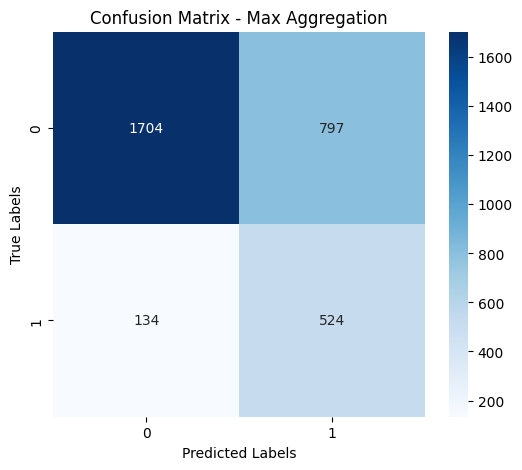

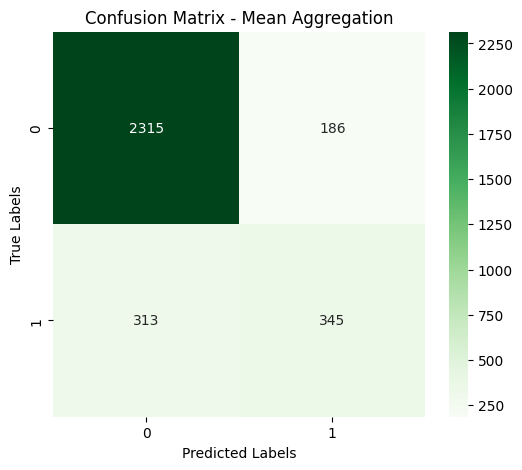

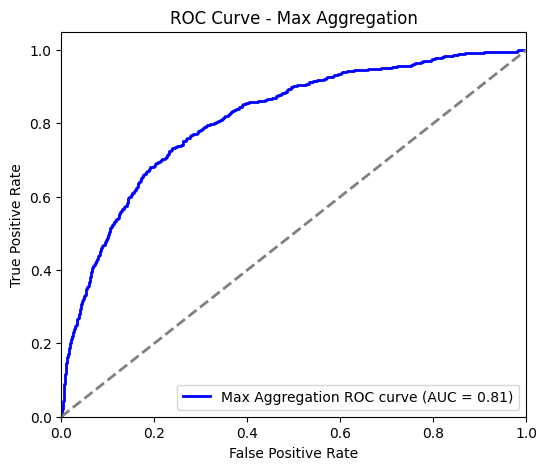

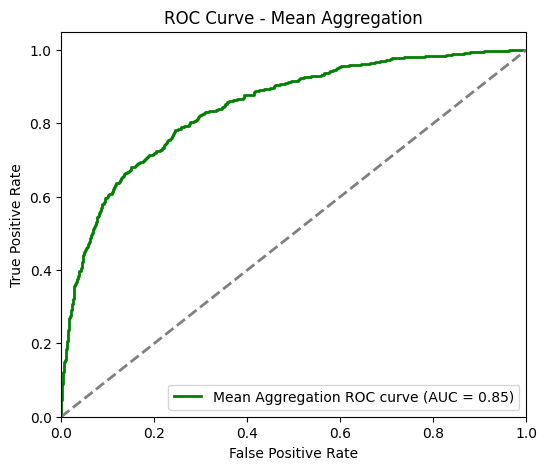

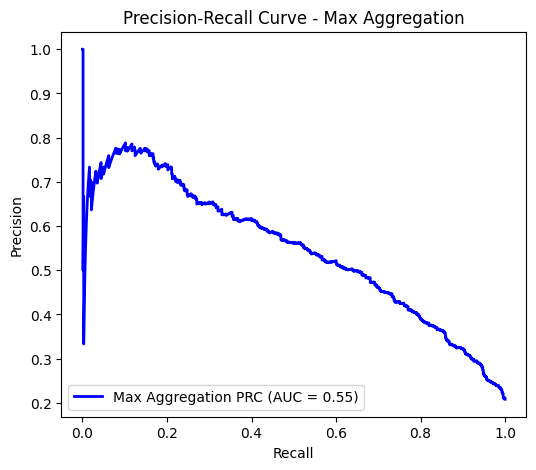

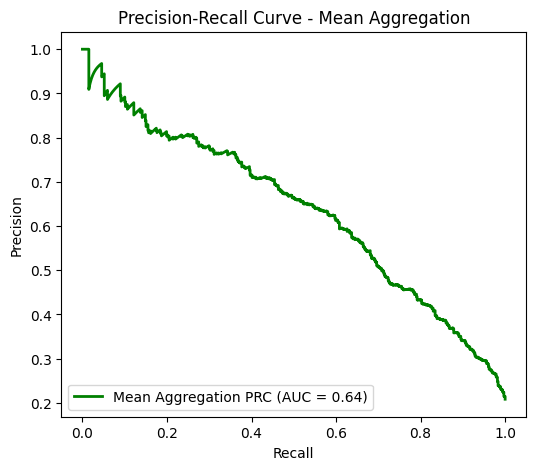

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

# Generate raw prediction probabilities
train_probs = model.predict(train_data).flatten()
test_probs = model.predict(test_data).flatten()

# Max Aggregation using raw probabilities
train_predictions_seq = (np.max(train_probs.reshape(-1, max_sequence_length_train), axis=1) > threshold).astype(int)
test_predictions_seq = (np.max(test_probs.reshape(-1, max_sequence_length_train), axis=1) > threshold).astype(int)

# Ensure labels are binary for evaluation
test_labels_seq = np.array([1 if np.any(labels) else 0 for labels in test_labels])

# Evaluation metrics for Max Aggregation
test_accuracy_max = accuracy_score(test_labels_seq, test_predictions_seq)
test_precision_max = precision_score(test_labels_seq, test_predictions_seq)
test_recall_max = recall_score(test_labels_seq, test_predictions_seq)
test_f1_max = f1_score(test_labels_seq, test_predictions_seq)

print("Max Aggregation Accuracy - Test:", test_accuracy_max)
print("Max Aggregation Precision - Test:", test_precision_max)
print("Max Aggregation Recall - Test:", test_recall_max)
print("Max Aggregation F1 - Test:", test_f1_max)

# Confusion Matrix
conf_matrix_max = confusion_matrix(test_labels_seq, test_predictions_seq)


# Calculate ROC curve and AUC for Max Aggregation using raw probabilities
fpr_max, tpr_max, _ = roc_curve(test_labels_seq, np.max(test_probs.reshape(-1, max_sequence_length_train), axis=1))
roc_auc_max = roc_auc_score(test_labels_seq, np.max(test_probs.reshape(-1, max_sequence_length_train), axis=1))

# Calculate Precision-Recall curve and AUC for Max Aggregation using raw probabilities
precision_max, recall_max, _ = precision_recall_curve(test_labels_seq, np.max(test_probs.reshape(-1, max_sequence_length_train), axis=1))
prc_auc_max = auc(recall_max, precision_max)

# Plotting the confusion matrices
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_max, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix - Max Aggregation')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Plotting the ROC curve for Max Aggregation
plt.figure(figsize=(6, 5))
plt.plot(fpr_max, tpr_max, color='blue', lw=2, label='Max Aggregation ROC curve (AUC = %0.2f)' % roc_auc_max)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Max Aggregation')
plt.legend(loc="lower right")
plt.show()


# Plotting the Precision-Recall curve for Max Aggregation
plt.figure(figsize=(6, 5))
plt.plot(recall_max, precision_max, color='blue', lw=2, label='Max Aggregation PRC (AUC = %0.2f)' % prc_auc_max)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Max Aggregation')
plt.legend(loc="lower left")
plt.show()

